In [11]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
folder=tb.latest_data()
a= pqsequence.PQSequenceAnalysis(folder,hdf5_mode='r')
# a.get_sweep_pts()
# agrp=a.adwingrp('ssro')
# a.get_sweep_idxs(noof_syncs_per_sweep_pt=agrp.attrs['syncs_per_sweep'])
# a.get_readout_results('ssro')
%matplotlib inline

430379


(<matplotlib.figure.Figure at 0x10640e90>,
 (<matplotlib.axes.AxesSubplot at 0x1062f7b0>,
  <matplotlib.axes.AxesSubplot at 0x108646b0>))

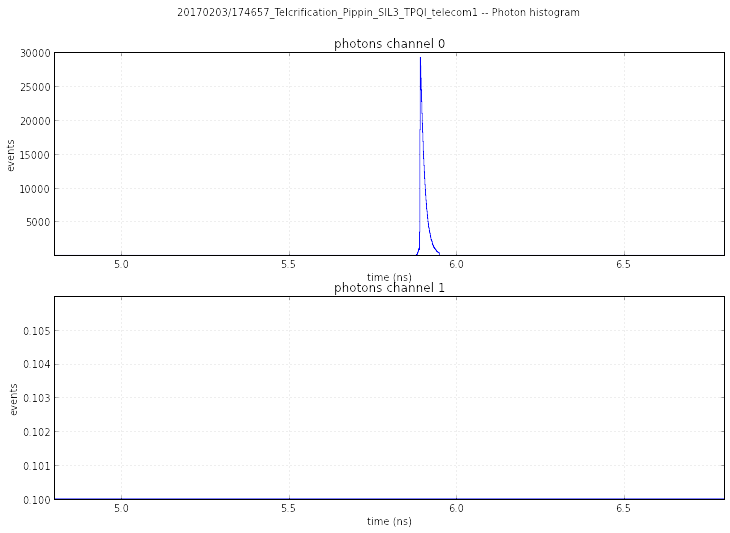

In [15]:
pq_plots.plot_photon_hist(a.pqf,start = 4800,  length = 2000, hist_binsize = 1, save = False, log=False)

In [ ]:
sp_lt = a.pqf['/PQ_special-1'].value      
ch_lt = a.pqf['/PQ_channel-1'].value
sn_lt = a.pqf['/PQ_sync_number-1'].value
st_lt = a.pqf['/PQ_sync_time-1'].value

### RO vs sweep

In [ ]:
ro_channel    = 0
ro_start      = 7900
ro_length     = 4000
fltr_ro    = (sp_lt == 0) & (ch_lt == ro_channel)  & (st_lt > ro_start)  & (st_lt < (ro_start  + ro_length))   

ro_results = np.zeros(a.sweep_length)
sn_ro = sn_lt[fltr_ro]
for sweep_idx in range(a.sweep_length):
    sn_ro_swe_idx = sn_lt[(a.sweep_idxs ==sweep_idx) & fltr_ro]
    #print len(np.unique(sn_ro_swe_idx))
    #fltr_ro_sweep_idxs=np.in1d(sn_sweep_idx, sn_ro)
    ro_results[sweep_idx] = float(len(np.unique(sn_ro_swe_idx)))/(a.reps*a.syncs_per_sweep/a.sweep_length)

In [ ]:
u_ro_results = np.sqrt(ro_results*(1-ro_results)/(a.reps*a.syncs_per_sweep/a.sweep_length))

In [ ]:
ax=subplot(111)
ax.errorbar(a.sweep_pts,ro_results, yerr=u_ro_results)
ax.set_xlabel(a.sweep_name)

### Tail W1/W2 vs sweep

In [ ]:
ro_channel    = 0
st_start = 9900
st_len   = 200 #50 ns
st_len_w2= 200

w1 = np.zeros(a.sweep_length)
w2 = np.zeros(a.sweep_length)
w0 = np.zeros(a.sweep_length)
for sweep_idx in range(a.sweep_length):
    p_sep = agrp.attrs['opt_sep'][sweep_idx]*1e9 #600 ns
    st_fltr_w0 = (sp_lt == 0) & (ch_lt == ro_channel)  & (st_lt > st_start)  & (st_lt < (st_start  + st_len)) 
    st_fltr_w1 = (sp_lt == 0) & (ch_lt == ro_channel)  & (st_lt > st_start+ p_sep)  & (st_lt < (st_start + p_sep + st_len)) 
    st_fltr_w2 = (sp_lt == 0) & (ch_lt == ro_channel)  & (st_lt > st_start + 2*p_sep)  & (st_lt < (st_start + 2*p_sep + st_len_w2)) 
    w0[sweep_idx] = np.sum(st_fltr_w0 & (a.sweep_idxs ==sweep_idx))
    w1[sweep_idx] = np.sum(st_fltr_w1 & (a.sweep_idxs ==sweep_idx))
    w2[sweep_idx] = np.sum(st_fltr_w2 & (a.sweep_idxs ==sweep_idx))    

In [ ]:
print 'avg tail:', (np.sum(w1) + np.sum(w2))/(a.reps*a.syncs_per_sweep)*1e4

In [ ]:
ax=subplot(111)
ax.set_title(a.default_plot_title)
ratiow1w2 = w1/w2
u_ratiow1w2 = np.sqrt(w1/w2**2 + w2*(w1/w2**2)**2)
ratiow0w1 = 0.5*w0/w1
u_ratiow0w1 = np.sqrt(w0/w1**2 + w1*(w0/w1**2)**2)
ratiow0w2 = 0.5*w0/w2
u_ratiow0w2 = np.sqrt(w0/w2**2 + w2*(w0/w2**2)**2)
ax.errorbar(a.sweep_pts,ratiow1w2,yerr=u_ratiow1w2, label = 'w1/w2')
ax.errorbar(a.sweep_pts,ratiow0w1,yerr=u_ratiow0w1, label = '0.5*w0/w1')
ax.errorbar(a.sweep_pts,ratiow0w2,yerr=u_ratiow0w2, label = '0.5*w0/w2')
ax.set_xlabel(a.sweep_name)
ax.set_ylabel('Ratio w1/w2')
ax.text(0.05, 0.95, 'Opt. pulse sep. = {} ns'.format(p_sep), transform=ax.transAxes,
        verticalalignment='top',horizontalalignment='left')
ax.legend()

#ax.text(a.sweep_pts[1],ax.get_ylim()[0]+0.05,'Opt. pulse sep. = {} ns'.format(p_sep))

In [ ]:
hist(st_lt[(a.sweep_idxs ==3)],bins =linspace(9900,10900,1000))
print ''

In [ ]:
w2

In [ ]:
a.sweep_pts

In [ ]:
a.normalized_ssro